## 1.IMPORTING LIBRARIES

    *Numpy for linear algebra and data manipulation.
    *Matplotlib for visualising data.
    *Pandas for loading and analyzing data.
    *Sklearn for normalizing the data and creating the model.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## 2.LOADING AND ANALYZING THE DATA

    *Loading the customers.csv dataset.
    *customers.csv is a demographic dataset taken from telecommunications industry.
    *Analyzing the data using pandas.


In [48]:
df = pd.read_csv("customers.csv")

df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Custcat (customer_category) has four classes: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

In [65]:
print("Customer categories and how many of them are there:\n{} ".format(df['custcat'].value_counts()))

Customer categories and how many of them are there:
3    281
1    266
4    236
2    217
Name: custcat, dtype: int64 


In [66]:
print("These are the features of our dataset:\n{}".format(df.columns))

These are the features of our dataset:
Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


Let's see the histogram describing the customers incomes and marital status.

array([[<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'marital'}>]], dtype=object)

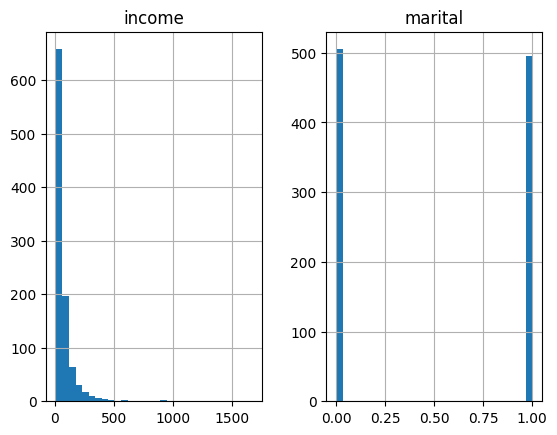

In [72]:
df.hist(column=["income","marital"], bins=30)

## 3.PREPARING AND SPLITTING DATA

    *Converting type of the data
    *Normalizing the data
    *Splitting train and test sets.

In [78]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values.astype(float)
y = df['custcat'].values.astype(int)

#We can also use:
#X = np.asanyarray(df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]) and
#y = np.asanyarray(df['custcat'])

print("Independent variable matrix:\n{}\n Dependent variable matrix:\n{}".format(X[:3], y[:3]))

Independent variable matrix:
[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]]
 Dependent variable matrix:
[1 4 3]


In [80]:
X = sklearn.preprocessing.StandardScaler().fit(X).transform(X)

print("Normalized independent variable matrix:\n{}".format(X))


Normalized independent variable matrix:
[[-0.02696767 -1.055125    0.18450456 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243 ... -0.22207644 -1.03459817
   2.55666158]
 [ 1.19883553  1.52109247  0.82182601 ... -0.22207644  0.96655883
  -0.23065004]
 ...
 [ 1.19883553  1.47425216  1.37948227 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  1.61477311  0.58283046 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  0.67796676 -0.45281689 ... -0.22207644  0.96655883
   0.46617787]]


In [92]:
print("Size of independent and dependent variable matrices before splitting:\n{}\n{}\n".format(X.shape, y.shape))

training_X, test_X, training_y, test_y = sklearn.model_selection.train_test_split(X,y, test_size=0.15)

print("Size of the training set:\n{}\n\nSize of the test set:\n{}".format((training_X.shape,training_y.shape),(test_X.shape,test_y.shape)))

Size of independent and dependent variable matrices before splitting:
(1000, 11)
(1000,)

Size of the training set:
((850, 11), (850,))

Size of the test set:
((150, 11), (150,))


4.CREATING and EVALUATING the MODEL

    *Creating the model using sklearn.
    *K-Nearest Neighbor technique is used for classification.
    *Trying from several k values and picking the best.


Firstly we will create a model for k=5. k depends on how much neighbor we are interested.

In [101]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5).fit(training_X, training_y)

y_hat = model.predict(test_X)

print("Training set accuracy: {}\nTest set accuracy: {}".format(
    round(sklearn.metrics.accuracy_score(training_y, model.predict(training_X)), 2), sklearn.metrics.accuracy_score(test_y, y_hat)
))

Training set accuracy: 0.55
Test set accuracy: 0.32


Example of prediction:

In [156]:
vector = test_X[12]
print("Data that we are going to use for prediction:\n{}\n".format(vector))

prediction = model.predict(vector.reshape(1, -1))
print("The predicted category is: {}".format(prediction))

Data that we are going to use for prediction:
[ 1.19883553  0.86532803 -1.16980352 -0.9900495  -0.84817577 -0.47233108
 -0.54919639 -0.49488715 -0.22207644  0.96655883  1.85983368]

The predicted category is: [3]


Evaluate the model picking k values in range of 1 and 20.

In [143]:
accuracy = np.zeros(shape=(20))

for i in range(1, 21):

    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i).fit(training_X, training_y)
    y_hat = model.predict(test_X)

    accuracy[i-1] = round(sklearn.metrics.accuracy_score(test_y, y_hat), 2)

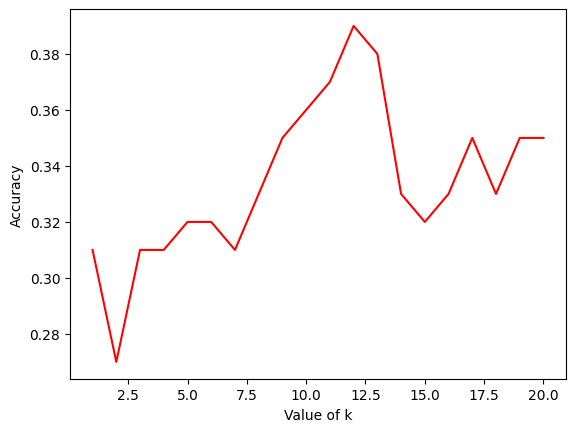

In [144]:
plt.plot(range(1,21), accuracy, '-r')
plt.ylabel("Accuracy")
plt.xlabel("Value of k")
plt.show()

In [145]:
print("The best k value is: {}\nThe highest accuracy is: {}".format(accuracy.argmax(), accuracy.max()))

The best k value is: 11
The highest accuracy is: 0.39


## 5.CONCLUSIONS

    *Although we've found the best k value, accuracy is still low.
    *Low accuracy can be explainied with:
        -Quality of the data
        -Sensitivity to the scale of the data and irrelevant features
    *Since KNN is not parametric and only depends on the data, it is very slow and computationally inefficient for high-dimensional data.